In [1]:
%load_ext autoreload
%autoreload 2

In [39]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
from library.analysis import TensorboardLogReader

In [40]:
unet_resnet34_train = TensorboardLogReader('output/Unet_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740840968.d4c8365383ba.1342.3')
unet_resnet34_test = TensorboardLogReader('output/Unet_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740842041.d4c8365383ba.1342.4')

deeplabv3_resnet34_train = TensorboardLogReader('output/DeepLabV3_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740835682.dc520e9c5b31.1490.1')
deeplabv3_resnet34_test = TensorboardLogReader('output/DeepLabV3_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740836780.dc520e9c5b31.1490.2')

deeplabv3plus_resnet34_train = TensorboardLogReader('output/DeepLabV3Plus_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740839667.d4c8365383ba.1342.0')
deeplabv3plus_resnet34_test = TensorboardLogReader('output/DeepLabV3Plus_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740840684.d4c8365383ba.1342.1')

print(unet_resnet34_train.tags)

NotFoundError: b'output/DeepLabV3_resnet34/EPO_30_loss_jaccard_lr_0.001/events.out.tfevents.1740835682.dc520e9c5b31.1490.1' does not point to valid Events file

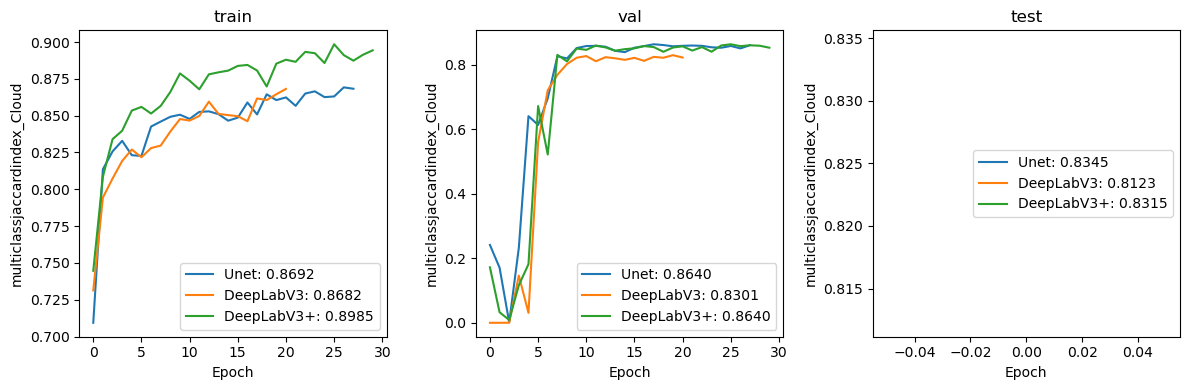

In [47]:
import matplotlib.pyplot as plt

nrows, ncols = 1, 3
metrics = 'multiclassjaccardindex_Cloud'
# Multiclass_Jaccard_Index

models = {
    'Unet': [unet_resnet34_train, unet_resnet34_test],
    'DeepLabV3': [deeplabv3_resnet34_train, deeplabv3_resnet34_test],
    'DeepLabV3+': [deeplabv3plus_resnet34_train, deeplabv3plus_resnet34_test]
}

fig = plt.figure(figsize=(ncols*4, nrows*4))


for i, t in enumerate(['train', 'val', 'test']):
    ax = fig.add_subplot(nrows, ncols, i+1)
    for k, m in models.items():
        m_scores = m[0] if t != 'test' else m[1]
        score = m_scores.get_values(f"{t}/{metrics}")
        ax.plot(score, label=f"{k}: {score.max():.4f}")
    ax.set_title(t)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(f"{metrics}")
    ax.legend()

fig.tight_layout()